Import Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [14]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [15]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","loans" ,"persloans", "agloans", "reloans", "ciloans"]]

Get x-axis labels

In [16]:
df_forLabels = df.sort_values(by=["year", "quarter"])
df_forLabels = df_forLabels[["year", "quarter"]]
df_forLabels = df_forLabels.drop_duplicates()
labels = []
for row in df_forLabels.itertuples():
    dictRow = row._asdict()
    labels.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))
ser_labels = pd.Series(labels)
ser_labels.index

RangeIndex(start=0, stop=152, step=1)

In [17]:
pivot = pd.pivot_table(df, index=["year", "quarter"], values=["loans","persloans", "agloans", "reloans", "ciloans"], aggfunc={"agloans": np.sum, "ciloans": np.sum, "loans": np.sum,"persloans": np.sum, "reloans": np.sum})
#fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,150,10))
years = [str(year) for year in range(1975, 2014)]
pivot
#ax.set_xticklabels(years, rotation=60)
#pivot.plot(ax=ax)
#print(type(pivot.loans))
#print(pivot.loans)
#ax.set_xticklabels(labels, rotation=60)
#ax.plot(pivot)

agloans       ciloans         loans     persloans       reloans
year   quarter                                                                    
1976.0 1.0      20441221.0  1.676811e+08  4.979078e+08  1.060998e+08  1.376262e+08
       2.0      22177608.0  1.702594e+08  5.121950e+08  1.105997e+08  1.423676e+08
       3.0      22891098.0  1.703788e+08  5.198481e+08  1.151447e+08  1.447915e+08
       4.0      23236481.0  1.780387e+08  5.413140e+08  1.185939e+08  1.501127e+08
1977.0 1.0      23679447.0  1.794227e+08  5.443855e+08  1.203665e+08  1.527350e+08
       2.0      25654452.0  1.847227e+08  5.691111e+08  1.282208e+08  1.606904e+08
       3.0      26282762.0  1.873944e+08  5.894286e+08  1.349610e+08  1.698303e+08
       4.0      25738061.0  1.963861e+08  6.174419e+08  1.409665e+08  1.776548e+08
1978.0 1.0      25430487.0  2.019310e+08  6.254696e+08  1.434821e+08  1.822649e+08
       2.0      27004808.0  2.114837e+08  6.609582e+08  1.540780e+08  1.920315e+08
       3.0      28061878.0  2.136983e+08  6.857319e+08  1.622529e+08  2.027878e+08
       4.0      28644625.0  3.084827e+08  8.594126e+08  1.718011e+08  2.169374e+08
1979.0 1.0      28568803.0  3.150647e+08  8.658298e+08  1.740961e+08  2.226560e+08
       2.0      30246358.0  3.295213e+08  9.064511e+08  1.827398e+08  2.320669e+08
       3.0      31278178.0  3.415252e+08  9.395805e+08  1.891959e+08  2.423246e+08
       4.0      31429442.0  3.507394e+08  9.652473e+08  1.926479e+08  2.488118e+08
1980.0 1.0      31034808.0  3.553541e+08  9.711778e+08  1.894684e+08  2.545423e+08
       2.0      31669404.0  3.623253e+08  9.781737e+08  1.849286e+08  2.572971e+08
       3.0      32273954.0  3.728004e+08  9.987059e+08  1.859509e+08  2.624784e+08
       4.0      32283570.0  3.908470e+08  1.036911e+09  1.874048e+08  2.686496e+08
1981.0 1.0      32044443.0  3.938253e+08  1.038640e+09  1.829522e+08  2.723027e+08
       2.0      33934357.0  4.109977e+08  1.075055e+09  1.858841e+08  2.786202e+08
       3.0      34323327.0  4.290762e+08  1.110798e+09  1.898194e+08  2.855352e+08
       4.0      33651773.0  4.545068e+08  1.152175e+09  1.928928e+08  2.910453e+08
1982.0 1.0      34033761.0  4.665138e+08  1.163195e+09  1.889862e+08  2.957412e+08
       2.0      36514798.0  4.827501e+08  1.195489e+09  1.920335e+08  3.004897e+08
       3.0      37684890.0  4.955164e+08  1.220066e+09  1.951931e+08  3.044615e+08
       4.0      36997694.0  5.039821e+08  1.244356e+09  1.990085e+08  3.075774e+08
1983.0 1.0      37188834.0  5.056254e+08  1.242586e+09  1.957102e+08  3.101873e+08
       2.0      39234165.0  5.060385e+08  1.264439e+09  2.027290e+08  3.174297e+08
       3.0      39933165.0  5.068143e+08  1.284405e+09  2.124443e+08  3.270850e+08
       4.0      39875743.0  5.242839e+08  1.333719e+09  2.242292e+08  3.355642e+08
1984.0 1.0      40137879.0  5.350201e+08  1.396263e+09  2.266319e+08  3.478052e+08
       2.0      42181327.0  5.531802e+08  1.448122e+09  2.402929e+08  3.613137e+08
       3.0      42364096.0  5.528023e+08  1.472445e+09  2.517678e+08  3.724462e+08
       4.0      40380789.0  5.650937e+08  1.525527e+09  2.663935e+08  3.845076e+08
1985.0 1.0      38968524.0  5.685899e+08  1.535034e+09  2.721029e+08  3.935735e+08
       2.0      40466401.0  5.707313e+08  1.569728e+09  2.845533e+08  4.063826e+08
       3.0      39706640.0  5.744284e+08  1.607008e+09  2.968358e+08  4.224016e+08
       4.0      36105573.0  5.772415e+08  1.645063e+09  3.078026e+08  4.368293e+08
1986.0 1.0      34344965.0  5.797833e+08  1.654673e+09  3.076195e+08  4.497043e+08
       2.0      34657179.0  5.807040e+08  1.683284e+09  3.166298e+08  4.652730e+08
       3.0      34180775.0  5.716879e+08  1.694978e+09  3.244406e+08  4.847837e+08
       4.0      31590237.0  6.002406e+08  1.766921e+09  3.338706e+08  5.132286e+08
1987.0 1.0      29198820.0  5.845011e+08  1.750331e+09  3.269705e+08  5.305105e+08
       2.0      30819014.0  5.821576e+08  1.778808e+09  3.311859e+08  5.546770e+08
       3.0      31040308.0  5.79652

Loan Distribution. Loan types plotted. Sum of loan types.

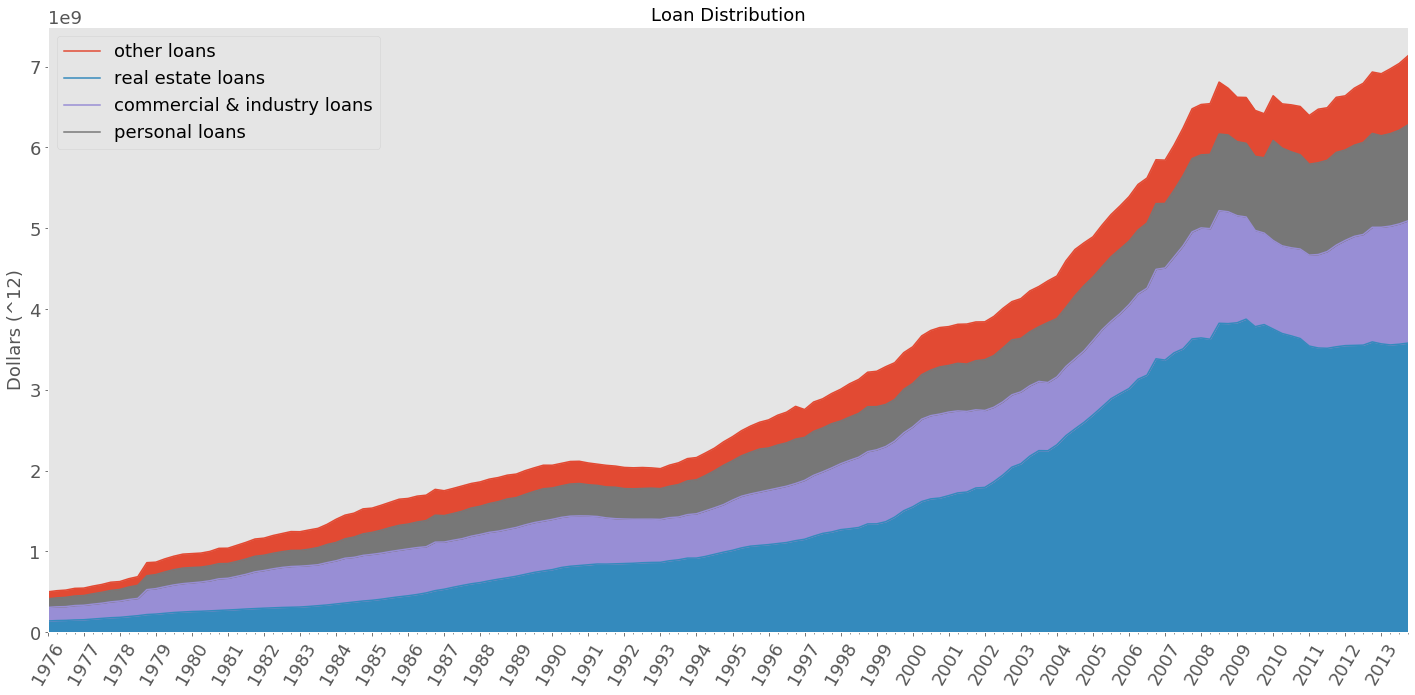

In [18]:
pivot_copy = pivot.copy()
pivot_copy = pivot.reset_index()
pivot_copy["re+ci"] = pivot_copy["reloans"] + pivot_copy["ciloans"]
pivot_copy["re+ci+pers"] = pivot_copy["re+ci"] + pivot_copy["persloans"]
#pivot_copy["re+ci+pers+ag"] = pivot_copy["re+ci+pers"] + pivot_copy["agloans"]
fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loan Distribution")
pivot_copy.loans.plot.area(ax=ax)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
#pivot_copy.reloans.plot.area(ax=ax,stacked=True)
#pivot_copy["re+ci"].plot.area(ax=ax, stacked=True)
#pivot_copy["re+ci+pers"].plot(ax=ax)
#pivot_copy["re+ci+pers+ag"].plot(ax=ax)
pivot_copy.plot.area(ax=ax, y=["reloans", "ciloans", "persloans"])
ax.set_xticklabels(years, rotation=60)
ax.legend(["other loans", "real estate loans", "commercial & industry loans", "personal loans"])
ax.set_ylabel("Dollars (^12)")
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LoanDistribution_7613')
#fig.("Loan Distribution")

Loans maturity analysis

In [19]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets","loans","persloans", "agloans", "reloans", "ciloans", "loansleases_less_3m", "loansleases_3m_1y","loansleases_1y_3y","loansleases_3y_5y","loansleases_5y_15y","loansleases_over_15y","resloans_less_3m","resloans_3m_1y","resloans_1y_3y",
"resloans_3y_5y","resloans_5y_15y"
,"resloans_over_15y"]]
df = df[df.year>=1997] #maturity data only available from 1997 onwards

#aggregate over year and quarter
df_agg_loans_maturity = df.groupby(["year", "quarter"]).sum()

df_agg_loans_maturity

rssdid        assets         loans     persloans     agloans       reloans       ciloans  loansleases_less_3m  loansleases_3m_1y  loansleases_1y_3y  loansleases_3y_5y  loansleases_5y_15y  loansleases_over_15y  resloans_less_3m  resloans_3m_1y  resloans_1y_3y  resloans_3y_5y  resloans_5y_15y  resloans_over_15y
year   quarter                                                                                                                                                                                                                                                                                                                              
1997.0 1.0      6.001297e+09  4.617155e+09  2.755303e+09  5.310003e+08  39325896.0  1.149223e+09  7.295488e+08         0.000000e+00                0.0                0.0                0.0                 0.0                   0.0               0.0             0.0             0.0             0.0              0.0                0.0
       2.0      6.004263e+09  4.746375e+09  2.848532e+09  5.445710e+08  43659925.0  1.187437e+09  7.531813e+08         1.309393e+09        436696609.0        421413346.0        284254405.0         254138981.0           120395966.0        63749439.0     154129577.0      76534708.0      48162492.0       94554175.0         81027260.0
       3.0      6.028993e+09  4.846712e+09  2.887924e+09  5.425045e+08  45020837.0  1.221494e+09  7.629102e+08         1.310262e+09        444884272.0        418314532.0        301474006.0         272004975.0           118465184.0        60073268.0     155012934.0      74827839.0      51871900.0      104935786.0         83923112.0
       4.0      6.088615e+09  4.989911e+09  2.953423e+09  5.475948e+08  44878118.0  1.239590e+09  7.923915e+08         1.337487e+09        449289931.0        428407685.0        305320964.0         287922326.0           122606691.0        62337471.0     153635990.0      75647510.0      52648073.0      107172157.0         87265757.0
1998.0 1.0      6.061302e+09  5.083924e+09  3.006531e+09  5.295050e+08  43051435.0  1.268103e+09  8.161768e+08         1.366148e+09        446701192.0        419516705.0        316309419.0         303037668.0           131923723.0        74396427.0     138093601.0      76041650.0      58993088.0      115881741.0         93833515.0
       2.0      6.135897e+09  5.156957e+09  3.074852e+09  5.355412e+08  47066668.0  1.280108e+09  8.460888e+08         1.382917e+09        456883689.0        416160373.0        330414386.0         323250761.0           142737321.0        72872843.0     127423110.0      73822119.0      61871482.0      123947638.0        100119335.0
       3.0      6.184073e+09  5.241902e+09  3.127678e+09  5.423046e+08  48201446.0  1.294690e+09  8.703045e+08         1.400375e+09        447880581.0        424644179.0        348073736.0         338043942.0           145400704.0        76198541.0     121877639.0      71784544.0      61338248.0      125237497.0        101367228.0
       4.0      6.218814e+09  5.412243e+09  3.217378e+09  5.565052e+08  46243093.0  1.339272e+09  8.943814e+08         1.424369e+09        462228195.0        425953062.0        354718916.0         355878249.0           170226390.0        83015410.0     113132063.0      68455122.0      59248412.0      133549617.0        125248561.0
1999.0 1.0      6.311133e+09  5.381566e+09  3.229028e+09  5.341217e+08  43947140.0  1.339915e+09  9.169769e+08         1.405083e+09        439089567.0        428044190.0        375959051.0         380272450.0           175535839.0        68870044.0     105438099.0      64832070.0      61231012.0      140121580.0        126838499.0
       2.0      6.400521e+09  5.437179e+09  3.285745e+09  5.204013e+08  46013790.0  1.366297e+09  9.308918e+08         1.427213e+09        434033233.0        431206727.0        389601737.0         391513074.0           187952355.0        65816803.0     101580612.0      63030745.0      65039161.0      146162805.0        133196813.0
       3.0      6.488877e+

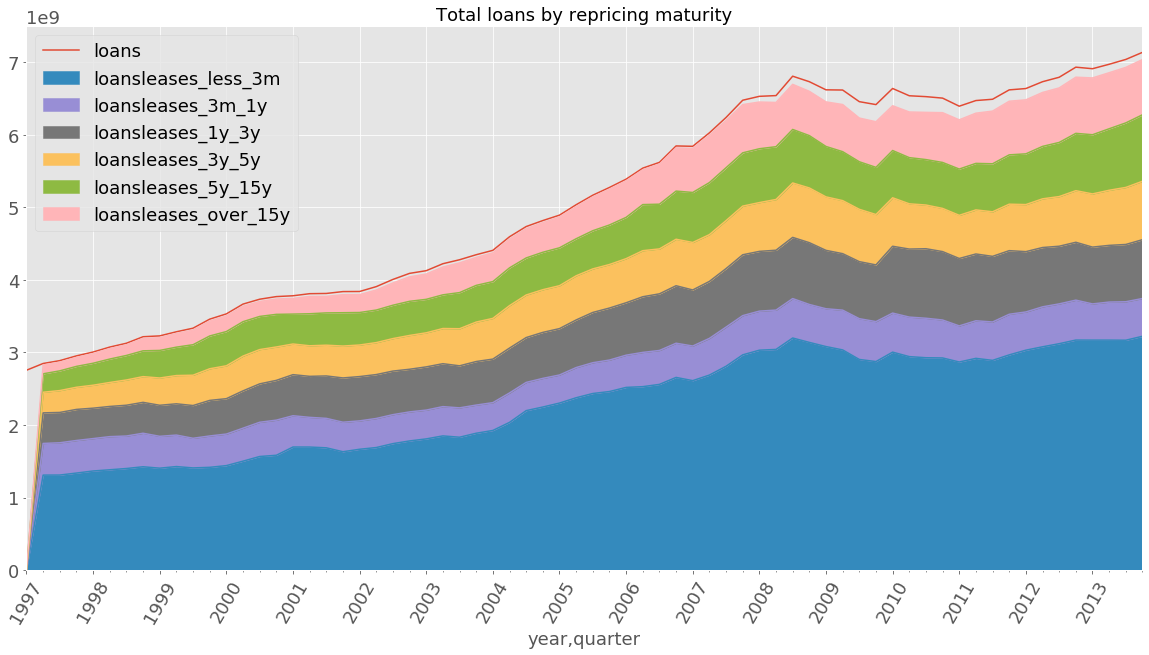

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,68,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
years = [str(year) for year in range(1997, 2014)]
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Total loans by repricing maturity")
#pivot2.plot(ax=ax2)
df_agg_loans_maturity.plot(ax=ax, y=["loans"])
df_agg_loans_maturity.plot.area(ax=ax, y=["loansleases_less_3m", "loansleases_3m_1y","loansleases_1y_3y","loansleases_3y_5y","loansleases_5y_15y","loansleases_over_15y"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid(True)

Share of loans by repricing maturity

In [21]:
df_agg_share_maturity = pd.DataFrame()

for (columnName, columnData) in df_agg_loans_maturity.iteritems():
    newcolumn = "share" + columnName
    df_agg_share_maturity[newcolumn] = df_agg_loans_maturity[columnName]/df_agg_loans_maturity.loans
    

#df_agg_share_maturity.drop(['shareresloans_less_3m', 'shareresloans_3m_1y', 'shareresloans_1y_3y', 'shareresloans_3y_5y', 'shareresloans_5y_15y', 'shareresloans_over_15y',"sharepersloans", "shareagloans", "sharereloans" , "shareciloans","sharerssdid" , "shareassets", "shareloans"], axis=1, inplace=True)
df_agg_share_maturity.columns


Index(['sharerssdid', 'shareassets', 'shareloans', 'sharepersloans', 'shareagloans', 'sharereloans', 'shareciloans', 'shareloansleases_less_3m', 'shareloansleases_3m_1y', 'shareloansleases_1y_3y', 'shareloansleases_3y_5y', 'shareloansleases_5y_15y', 'shareloansleases_over_15y', 'shareresloans_less_3m', 'shareresloans_3m_1y', 'shareresloans_1y_3y', 'shareresloans_3y_5y', 'shareresloans_5y_15y', 'shareresloans_over_15y'], dtype='object')

NameError: name 'paired' is not defined

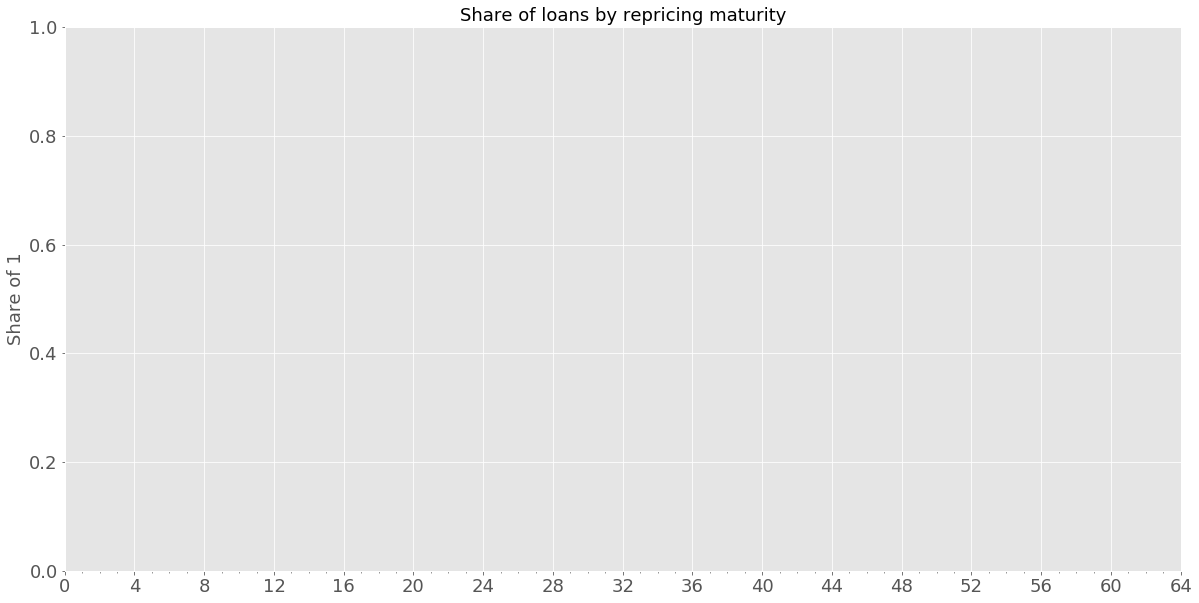

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1997, 2014)]
ax.set_xticks(range(0,68,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of loans by repricing maturity")
ax.set_ylabel("Share of 1")
#df_agg.assets.plot(ax=ax)
#paired = cm.get_cmap('Paired', 12)
#df_agg_share_maturity.plot.area(ax=ax, colormap=paired)
df_agg_share_maturity.plot.area(ax=ax, y=['shareloansleases_less_3m', 'shareloansleases_3m_1y', 'shareloansleases_1y_3y', 'shareloansleases_3y_5y', 'shareloansleases_5y_15y', 'shareloansleases_over_15y'], colormap=paired)
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofMaturityLoans_9713.png')

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax.set_xticklabels(years, rotation=60)
pivot_copy.loans.plot(ax=ax1)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
pivot_copy.reloans.plot.bar(ax=ax1)
pivot_copy["re+ci"].plot.bar(ax=ax1)
pivot_copy["re+ci+pers"].plot.bar(ax=ax1)
#pivot_copy["re+ci+pers+ag"].plot.bar(ax=ax1)
ax1.legend()
ax1.grid()
print(years)

Residential loans

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,68,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
years = [str(year) for year in range(1997, 2014)]
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Residential loans by repricing maturity")
#pivot2.plot(ax=ax2)
df_agg_loans_maturity.plot.area(ax=ax, y=["resloans_less_3m","resloans_3m_1y","resloans_1y_3y","resloans_3y_5y","resloans_5y_15y","resloans_over_15y"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid(True)
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_MaturityResLoans_9713.png')

Share of loans by repricing maturity

In [ ]:
df_agg_loans_maturity["totalresloans"] = (df_agg_loans_maturity.iloc[:,13:19].sum(axis=1))

for (columnName, columnData) in df_agg_loans_maturity.iteritems():
    newcolumn = "share" + columnName
    df_agg_share_maturity[newcolumn] = df_agg_loans_maturity[columnName]/df_agg_loans_maturity.totalresloans
    

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1997, 2014)]
ax.set_xticks(range(0,68,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of residential loans by repricing maturity")
ax.set_ylabel("Dollar (^12)")
#df_agg.assets.plot(ax=ax)
#paired = cm.get_cmap('Paired', 12)
#df_agg_share_maturity.plot.area(ax=ax, colormap=paired)
df_agg_share_maturity.plot.area(ax=ax, y=['shareresloans_less_3m', 'shareresloans_3m_1y', 'shareresloans_1y_3y', 'shareresloans_3y_5y', 'shareresloans_5y_15y', 'shareresloans_over_15y'], colormap=paired)
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofMaturityResLoans_9713.png')

Security Distribution

In [ ]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"]]
pivot1 = pd.pivot_table(df, index=["year", "quarter"], values=["securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"], aggfunc={"securities": np.sum, "securitiesheldtomaturity": np.sum, "securities_ammcost": np.sum,"securitiesavailableforsale": np.sum})
pivot1 = pivot1.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Security Distribution")
pivot1.securities.plot(ax=ax2)
pivot1.plot.area(ax=ax2, y=["securitiesheldtomaturity", "securitiesavailableforsale"])
ax2.legend()
ax2.grid(True)
ax2.set_ylabel("Dollars (^12)")
ax2.set_xticklabels(years, rotation=60)
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_SecurityDistribution_7613.png')

Analysis of deposits

In [ ]:
df = df_raw[["rssdid", "name", 'year', "quarter","deposits", "demanddep", "transdep","brokereddep" ,"timedepge100k", "timedeple100k", "timesavdep", "nontransdep", "timedep", "savdep"]]
pivot2 = pd.pivot_table(df, index=["year", "quarter"], values=["deposits", "demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"], aggfunc={"deposits": np.sum, "demanddep": np.sum, "transdep": np.sum, "brokereddep": np.sum,"nontransdep": np.sum, "timedep": np.sum, "savdep": np.sum})
pivot2 = pivot2.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
#pivot2.plot(ax=ax2)
pivot2.plot(ax=ax2, y=["deposits","demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)
ax2.legend()
ax2.grid()

Non-Transaction deposits compared with time and saving deposits

In [ ]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.nontransdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)

ax2.legend()
ax2.set_ylabel("Dollars (^12)")
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_DepositDistribution_7613.png')

Transaction deposits analysed.

In [ ]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.transdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["demanddep"])
ax2.legend()

Total deposits = transdep + nontransdep

In [ ]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.deposits.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["transdep", "nontransdep"])
ax2.legend()
ax2.grid()

Analysing liability side:

In [ ]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities","subordinateddebt", "liabilities"]]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherliab"] = df_agg["assets"] - (df_agg.iloc[:,4:11].sum(axis=1))


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
ax.set_ylabel("Dollar (^12)")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
#ax.set_ylabel("Dollar (^12)")
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LiabilitiesDistribution_7613.png')

Share of balance sheet positions (liabilities side)

In [ ]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofLiabilities_7613.png')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","liabilities"])
ax.legend()
ax.grid()

Analysing assets side:

In [ ]:
df = df_raw[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df = df[(df.rssdid!=1456501) & (df.bhcid!=2380443)]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherassets"] = df_agg["assets"] - (df_agg.iloc[:,5:10].sum(axis=1))
#df_agg.iloc[:,5:10]
df_agg

Datasets for top 0.1%, 1%, 5%, 50%

In [ ]:
year = 1976

topOnePercent = pd.DataFrame()
topFivePercent = pd.DataFrame()
topTenPercent = pd.DataFrame()
topFiftyPercent = pd.DataFrame()

for i in range(38):
    quarter=1
    temp_df_year = df[df.year==year]
    #print(year)
    
    for j in range(4):
        #print(quarter)
        temp_df = temp_df_year[temp_df_year.quarter==quarter]
        temp_df = temp_df.sort_values(by=["assets"], ascending=False )
        #print(len(temp_df))
        onepercent = round(0.001*len(temp_df))
        fivepercent = round(0.01*len(temp_df))
        tenpercent = round(0.10*len(temp_df))
        fiftypercent = round(0.50*len(temp_df))
        #print(onepercent)
        temp_df_One = temp_df.iloc[:onepercent,:]
        temp_df_Five = temp_df.iloc[:fivepercent, :]
        temp_df_Ten = temp_df.iloc[:tenpercent, :]
        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]
        topOnePercent = topOnePercent.append(temp_df_One)
        topFivePercent = topFivePercent.append(temp_df_Five)
        topTenPercent = topTenPercent.append(temp_df_Ten)
        topFiftyPercent = topFiftyPercent.append(temp_df_Fifty)
        quarter = quarter + 1
    
    year = year + 1

In [ ]:
df_aggOnePercent = topOnePercent.groupby(["year", "quarter"]).sum()
df_aggFivePercent = topFivePercent.groupby(["year", "quarter"]).sum()
df_aggTenPercent = topTenPercent.groupby(["year", "quarter"]).sum()
df_aggFiftyPercent = topFiftyPercent.groupby(["year", "quarter"]).sum()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^13)")
df_agg.assets.plot(ax=ax)
df_aggOnePercent.assets.plot(ax=ax)
df_aggFivePercent.assets.plot(ax=ax)
df_aggTenPercent.assets.plot(ax=ax)
df_aggFiftyPercent.assets.plot(ax=ax)
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["All banks assets","Top 0.1% banks assets", "Top 1% banks assets", "Top 5% banks assets", "Top 50% banks assets"])
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksPercentiles_7613.png')

Assets growth trend

In [ ]:
df_agg

In [ ]:
df_agg_ts = df_agg.copy()
index = pd.DatetimeIndex(start='1976Q1', end='2014Q1', freq='Q')
#index
df_agg_ts.set_index(index, inplace=True)
df_agg_ts

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(df_agg_ts.assets, 1600)
assets_decomp = df_agg_ts[["assets"]]
assets_decomp["cycle"] = cycle
assets_decomp["trend"] = trend
assets_decomp

In [ ]:

fig, ax = plt.subplots(figsize=(20,12))
assets_decomp[["assets", "trend", "cycle"]].plot(ax=ax)


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loans")
ax.set_ylabel("Dollar (^12)")
df_agg.loansnet.plot(ax=ax)
df_aggOnePercent.loansnet.plot(ax=ax)
df_aggFivePercent.loansnet.plot(ax=ax)
df_aggTenPercent.loansnet.plot(ax=ax)
df_aggFiftyPercent.loansnet.plot(ax=ax)
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["All banks loans","Top 0.1% banks loans", "Top 1% banks loans", "Top 5% banks loans", "Top 50% banks loans"])
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksLoansPercentiles_7613.png')

Growth rates assets per quarter

In [ ]:
#add growth column
df_agg_growth = df_agg.copy()
df_agg_growth.insert(2,"growth", 0)

print(df_agg_growth.iloc[1,4])

#loop
for i in range(1,152):
    df_agg_growth.iloc[i,2] = (df_agg_growth.iloc[i,5] - df_agg_growth.iloc[i-1,5]) / df_agg_growth.iloc[i-1,5]

df_agg_growth

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Quartely growth of assets of commercial banks")
ax.set_ylabel("Dollar (^13)")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth.plot.bar(ax=ax, y=["growth"])
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=90)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssets_7613.png')

Growth rates assets per year

In [ ]:
df_agg_growth_year = df_agg_growth.copy()
df_agg_growth_year = df_agg_growth_year[df_agg_growth_year.quarter==4] #filter dataset for quarter 4 entrys
#df_agg_growth_year = df_agg_growth_year.groupby(["year"]).mean()
df_agg_growth_year.growth = df_agg_growth_year.growth * 100

fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.set_title("Growth of assets of commercial banks per year")
ax.set_ylabel("Annual rate in percent(%)")
ax.set_xlabel("Year")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth_year["positive"] = df_agg_growth_year.growth > 0
#df_agg_growth_year.plot.bar(ax=ax, y=["growth"], color=df_agg_growth_year.positive.map({True: 'r', False: 'g'}))
df_agg_growth_year.growth.plot(kind="bar", color=df_agg_growth_year.positive.map({True: 'g', False: 'r'}))
ax.set_xticks(range(0,38))
ax.set_xticklabels(years, rotation=45)
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssetsYear_7613.png')
#df_agg_growth_year

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^13)")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives", "otherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_AssetDistribution_7613.png')

In [ ]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "sharebhcid"], axis=1, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (asset side)")
ax.set_ylabel("Dollar (^13)")
#df_agg.assets.plot(ax=ax)
df_agg_share.plot.area(ax=ax)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssets_7613.png')

Median Bank: Assets and Liabilities

In [ ]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median


In [ ]:
df_liab_median_2000 = df_liab_median[(df_liab_median.year==2000) & (df_liab_median.quarter==4)]
df_liab_median_2000_T = df_liab_median_2000.T
df_liab_median_2000_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2000_T = df_liab_median_2000_T[df_liab_median_2000_T[99]!=0]

df_liab_median_2009 = df_liab_median[(df_liab_median.year==2009) & (df_liab_median.quarter==4)]
df_liab_median_2009_T = df_liab_median_2009.T
df_liab_median_2009_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2009_T.rename(columns={"data":135}, inplace=True)
df_liab_median_2009_T = df_liab_median_2009_T[df_liab_median_2009_T[135]!=0]

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,15)) 
#spezifische columns auswählen
#df_liab_median_2000.rename(columns={"99":"medianbank"}, inplace=True)
ax[0].set_title("Median bank in 2000")
ax[1].set_title("Median bank in 2009")
df_liab_median_2000_T.plot.pie(ax=ax[0], y=99,autopct='%1.1f%%')
df_liab_median_2009_T.plot.pie(ax=ax[1], y=135,autopct='%1.1f%%')

In [ ]:

fig, ax = plt.subplots(4,4,figsize=(20,20))
ax = ax.ravel() 
year = 1997

for x in range(0,16):
    temp_df_liab = df_liab_median[(df_liab_median.year==year) & (df_liab_median.quarter==4)]
    
    temp_df_liab_T = temp_df_liab.T
    temp_df_liab_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
    column_name = temp_df_liab_T.columns[0]
    temp_df_liab_T = temp_df_liab_T[temp_df_liab_T[column_name]!=0]
    ax[x].set_title("Median bank in " + str(year))
    #print(temp_df_liab_T.index.values)
    #temp_df_liab_T.plot.pie(ax=ax[x], labels=None, y=column_name,autopct='%1.1f%%')
    ax[x].pie(temp_df_liab_T[column_name], labels=None,autopct='%1.1f%%' )
    ax[x].axis('equal')
    ax[x].legend(temp_df_liab_T.index.values)
    year = year + 1

    
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_MedianBankEveryYear_7613.png')

In [ ]:
import seaborn
import probscale

In [ ]:
df = df_raw[df_raw[]]

In [ ]:
df_sb = df_raw[["assets", "equity","deposits", "tradingliabilities", "liabilities"]]
sns.pairplot(df_sb)